<a href="https://colab.research.google.com/github/gonzaloelejalde/piii-2025/blob/main/clase09/clase09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Filtro transmisor y generador de símbolos (ipynb)**

El siguiente código es para graficar el filtro transmisor con un diseño en la gráfica:



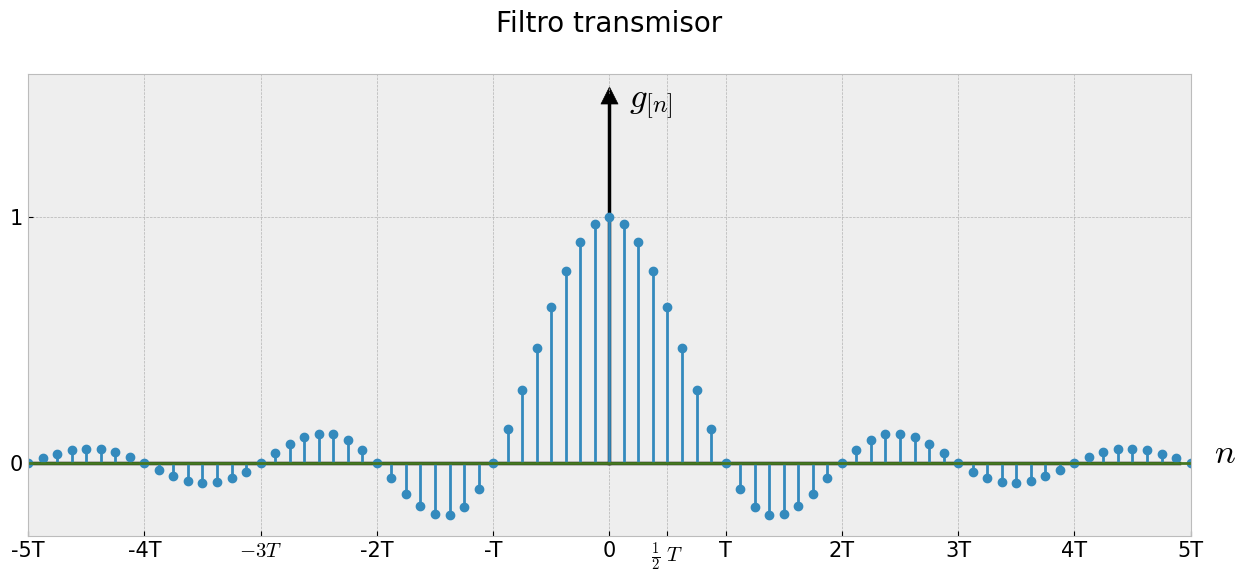

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use( 'bmh' )

# ====================
#  Generación de g[n]
# ====================

fB = 32e9    # Velocidad de simbolos (baud rate)
# Es la frecuencia de los simbolos, 32 GBaudios

T = 1 / fB   # Tiempo entre símbolos
M = 8        # Factor de sobremuestreo
fs = fB * M  # Sample rate

alpha = 0.1  # Factor de roll-off
L = 20       # ( 2 * L * M + 1 ) es el largo del filtro sobremuestreado

t = np.arange( -L, L, 1 / M ) * T

gn = np.sinc( t / T ) * np.cos( np.pi * alpha * t / T ) / ( 1 - 4 * alpha**2 * t**2 / T**2 )

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 15, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

x1_ejeVertical, y1_ejeVertical = [ 0, 0 ], [ 0, 1.5 ]
ax.plot( x1_ejeVertical, y1_ejeVertical, linewidth = 2.5, color = 'black' )
ax.scatter( x1_ejeVertical[ 1 ], y1_ejeVertical[ 1 ], marker = "^", color = 'black', s = 150 )

x1_ejeHorizontal, y1_ejeHorizontal = [ -5*T, 4.9*T ], [ 0, 0 ]
ax.plot( x1_ejeHorizontal, y1_ejeHorizontal, linewidth = 2.5, color = 'black' )

ax.stem( t, gn)
ax.set_title( 'Filtro transmisor' )

plt.text( T/6, 1.45, r'$g_{[n]}$', fontsize = 25, color = 'black' )
plt.text( 5.2*T, 0, r'$n$', fontsize = 25, color = 'black' )

abcisas = [ -5*T, -4*T, -3*T, -2*T, -T, 0, T/2, T, 2*T, 3*T, 4*T, 5*T ]
textos_abcisas = [ '-5T', '-4T', r'$-3T$', '-2T', '-T', '0', r'$\frac{1}{2} \ T$', 'T', '2T', '3T', '4T', '5T' ]
plt.xticks( abcisas, textos_abcisas )
ordenadas = [ 0, 1 ]
textos_ordenadas = [ '0', '1' ]
plt.yticks( ordenadas, textos_ordenadas )

plt.xlim( [ -5*T, 5*T ] )

plt.show()

El siguiente código permite generar 1000 símbolos para PAM2


In [ ]:
import numpy as np
from random import randrange, seed
import datetime

segundos_desde_1970 = int( datetime.datetime.now().timestamp() )
seed( segundos_desde_1970 )

simbolos_PAM2 = np.empty( 1000 )

for i in range( 1000 ) :
    simbolos_PAM2[ i ] = randrange( -1, 2, 2 )

print( simbolos_PAM2 )

[ 1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.
  1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
  1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.
  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1

Ejercicio 17

Explicación linea por linea:


**import numpy as np**

**import datetime**

numpy lo usamos para manejar arrays y generar números aleatorios de forma eficiente.

datetime lo usamos para obtener la hora actual y así crear una semilla variable.

***

**segundos_desde_1970 = int(datetime.datetime.now().timestamp())**

datetime.datetime.now() devuelve la hora actual.

.timestamp() convierte esa hora en “segundos desde el 1 de enero de 1970” (Epoch time).

int() lo convierte en entero.

Resultado: un número distinto cada vez que ejecutás el código → semilla variable.

***

**np.random.seed(segundos_desde_1970)**

Fija la semilla del generador de números aleatorios de NumPy.

Así, aunque uses NumPy, los números generados serán diferentes cada vez (pero reproducibles si usás la misma semilla).

***

**simbolos_PAM2 = np.random.choice([-1, 1], size=1000)**

np.random.choice() elige aleatoriamente valores de la lista [-1, 1].

size=1000 indica cuántos valores se deben generar.

Resultado: un arreglo (numpy.ndarray) con 1000 símbolos, cada uno igual a −1 o +1 → modulación PAM2.

***

**print(simbolos_PAM2)**

Muestra en pantalla el arreglo de 1000 símbolos generados.

Generar 1000 simbolos para PAM4

In [ ]:
import numpy as np
import datetime

# Semilla basada en la hora actual (segundos desde 1970)
segundos_desde_1970 = int(datetime.datetime.now().timestamp())
np.random.seed(segundos_desde_1970)

# Definimos los 4 niveles de PAM4
niveles_PAM4 = [-3, -1, 1, 3]

# Generamos 1000 símbolos PAM4
simbolos_PAM4 = np.random.choice(niveles_PAM4, size=1000)

print(simbolos_PAM4)


[-3 -3  1 -1  1 -1 -1 -3 -1 -1  1  3 -3 -1  3 -1  3 -1 -1  3 -1 -3  1  1
 -1  3  3  1 -1  3  1 -3  3 -3 -3 -3 -3  3  1 -3  3  1 -1  3  1 -3 -3  3
  1  1  1 -1 -1 -1  1 -1  3  3  1  1  3 -3  1  1 -3  3  1  1  3 -3 -3  1
 -1 -3 -3 -3 -3 -3 -3 -1 -1 -3 -1  1  1 -3 -1  1 -3 -1 -3 -1 -1  1  3  1
  3  3 -1  3 -1  3  1  1 -3 -3  1  1  1  3 -1 -3  3  3  1  3  3 -3 -1 -1
 -3 -1 -1  1  1 -3 -1 -1  1  3 -3  3 -1 -1 -3 -1  3 -3  1 -3  1 -3 -1 -1
 -1  1 -1 -1  1 -1 -3 -3 -3  3 -3 -1 -1  1 -1  3 -3 -3 -1 -1 -1 -3 -1 -1
 -1 -1 -3 -3 -3 -1  3 -1 -1 -3  3 -3  1  1  1 -3  3  1 -3 -3  1 -1 -1 -1
 -3  3 -3  1 -1  1 -1  1 -1  3  3  1 -1  1 -1 -3  1 -3  1 -3 -3  3 -3  1
  1  3  3  1 -3  1 -3 -1  1  1 -3  1  3 -1  3 -3  3  1 -1  3  3  1  1  1
  1 -1  3  3 -3 -3 -3  3 -3  3 -1 -3 -1  3 -1  3 -1 -3  3  3  1 -3  1 -1
  1 -3  3 -3 -1  1 -3  3 -3 -3 -3  1  3  3  3 -3 -1 -1  3 -1  3  1  3 -3
  1 -1 -3  1 -1  3  1  3 -1  1  1 -3  3  1  1 -1 -1 -3 -3  3  3 -3 -1 -3
 -3  3  1 -3 -3 -1  3  3 -3  1  1 -1 -3  1  3 -1 -1

Ejercicio 18

Señal Transmitida

Pasaron 1756942137 segundos desde el 1ero de enero de 1970

Una muestra de los símbolos generados:
 [-1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
  1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.
  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.]


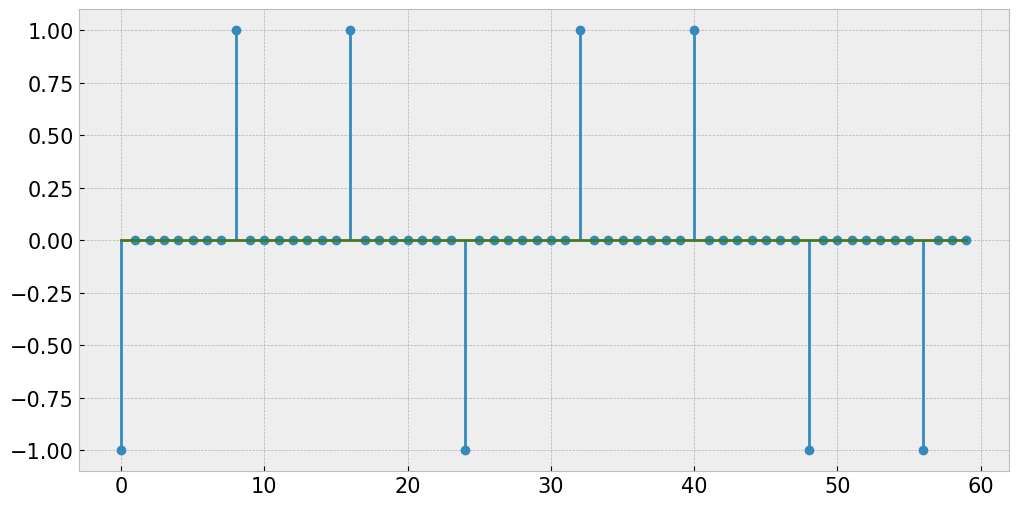

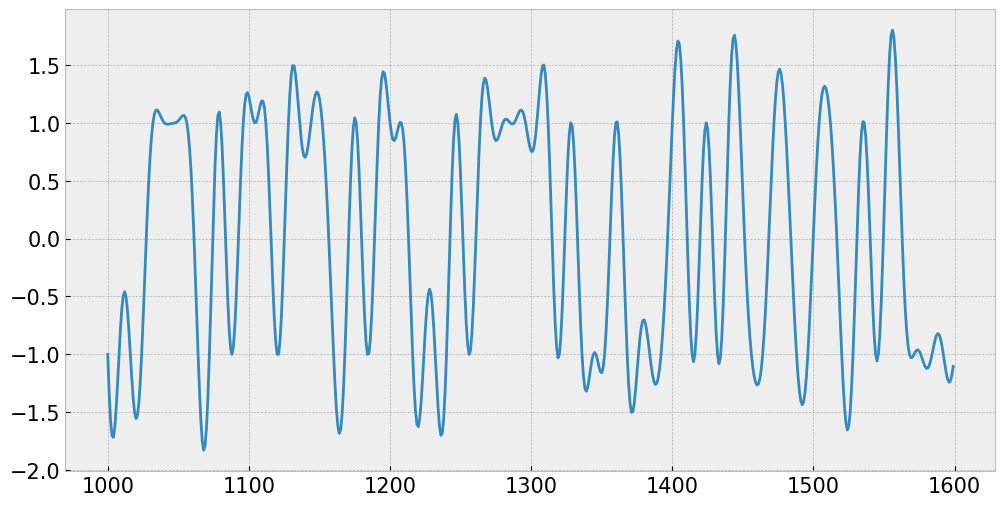

In [ ]:

import numpy as np
from random import randrange, seed
import datetime

segundos_desde_1970 = int( datetime.datetime.now().timestamp() )

print( 'Pasaron', segundos_desde_1970, 'segundos desde el 1ero de enero de 1970' )
seed( segundos_desde_1970 )

cantidad_simbolos = 1000
simbolos_PAM2 = np.empty( cantidad_simbolos )

for i in range( cantidad_simbolos ) :
    simbolos_PAM2[ i ] = randrange( -1, 2, 2 )

print( '\nUna muestra de los símbolos generados:\n', simbolos_PAM2[ 0 : 50 ] )

xn = np.zeros( cantidad_simbolos * M )

for i in range( cantidad_simbolos ) :
    xn[ i * M ] = simbolos_PAM2[ i ]

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 12, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

cuantos_chupetines = 60
ax.stem( np.arange( 0, cuantos_chupetines ), xn[ 0 : cuantos_chupetines ])

plt.show()

from scipy.signal import convolve

sn = convolve( xn, gn )

fig, ax = plt.subplots()

cuantos_chupetines = 1600
ax.plot( np.arange( 1000, cuantos_chupetines ), sn[ 1000 : cuantos_chupetines ] )
# ax.stem( np.arange( 1000, cuantos_chupetines ), sn[ 1000 : cuantos_chupetines ] )

plt.show()

Diagrama de Ojo

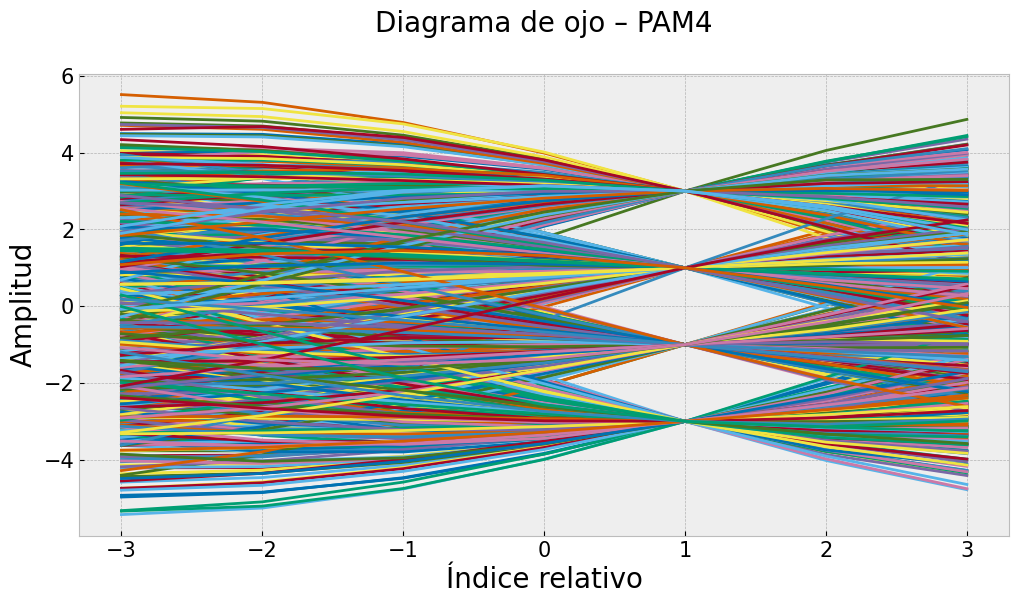

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange, seed
import datetime

# Parámetros básicos
M = 8      # sobremuestreo
L = 20     # longitud del filtro (mitad)
cantidad_simbolos = 1000

# =========================
# 1. Generar símbolos PAM4
# =========================
segundos_desde_1970 = int(datetime.datetime.now().timestamp())
seed(segundos_desde_1970)

simbolos_PAM4 = np.empty(cantidad_simbolos)
for i in range(cantidad_simbolos):
    simbolos_PAM4[i] = randrange(-3, 4, 2)   # -3, -1, +1, +3

# =========================
# 2. Sobremuestreo
# =========================
xn = np.zeros(cantidad_simbolos * M)
for i in range(cantidad_simbolos):
    xn[i * M] = simbolos_PAM4[i]

# =========================
# 3. Filtro transmisor (ejemplo: Raised Cosine simplificado)
# =========================
fB = 32e9     # Baud rate
T = 1/fB
alpha = 0.1   # roll-off
t = np.arange(-L, L, 1/M) * T
gn = np.sinc(t/T) * np.cos(np.pi * alpha * t/T) / (1 - 4 * alpha**2 * t**2 / T**2)

sn = np.convolve(xn, gn, mode='same')   # señal filtrada

# =========================
# 4. Diagrama de ojo (mismo formato que tu ejemplo)
# =========================
d = 4  # Delay para centrar el ojo

for i in range(2 * L + 1, cantidad_simbolos - (2 * L + 1)):
    sn_p = sn[i * M + d : i * M + d + M]
    plt.plot(np.arange(-3, 4), sn_p[1:8])   # mismo estilo que tu código original

plt.title("Diagrama de ojo – PAM4")
plt.xlabel("Índice relativo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



Ampliar la gráfica del diagrama ojo

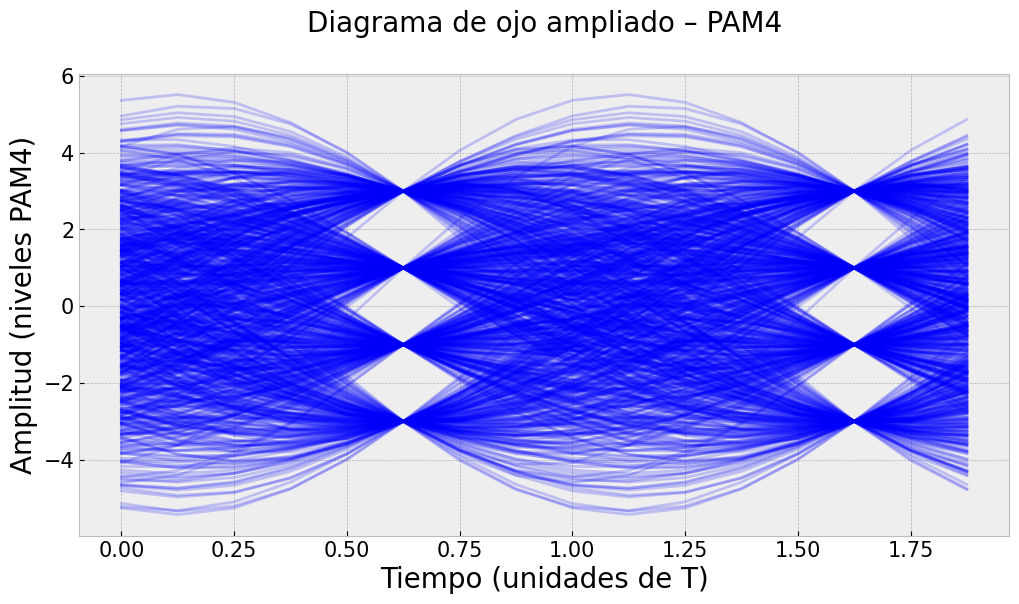

In [15]:
# --- Delay para centrar el ojo ---
d = 4            # Delay para centrar el ojo
ventana_simbolos = 2  # cuántos símbolos se quieren ver de ancho en el ojo

plt.figure(figsize=(12, 6))

for i in range(2 * L + 1, cantidad_simbolos - (2 * L + 1)):
    # Extraer varias muestras correspondientes a varios símbolos
    sn_p = sn[i * M + d : i * M + d + M * ventana_simbolos]

    # Eje temporal relativo en unidades de T (tiempo de símbolo)
    tiempo_relativo = np.arange(len(sn_p)) / M

    # Dibujar una curva por cada símbolo superpuesto
    plt.plot(tiempo_relativo, sn_p, color='blue', alpha=0.2)

plt.title("Diagrama de ojo ampliado – PAM4")
plt.xlabel("Tiempo (unidades de T)")
plt.ylabel("Amplitud (niveles PAM4)")
plt.grid(True)
plt.show()
